In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [3]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.shape

(8807, 12)

In [18]:
netflix_copy = netflix.copy()

In [19]:
netflix_copy.date_added = pd.to_datetime(netflix_copy.date_added)

netflix_copy['month_added'] = netflix_copy.date_added.dt.month
netflix_copy['year_added'] = netflix_copy.date_added.dt.year

In [ ]:
netflix_copy = netflix_copy[['']]

In [21]:
fig = plt.figure()
bar = ''
def buildmebarchart(i=int):
    iv = min(i, len(netflix_copy.index)-1) #the loop iterates an extra one time, which causes the dataframes to go out of bounds. This was the easiest (most lazy) way to solve this :)
    objects = netflix_copy.max().index
    y_pos = np.arange(len(objects))
    performance = netflix_copy.iloc[[iv]].values.tolist()[0]
    if bar == 'vertical':
        plt.bar(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.xticks(y_pos, objects)
        plt.ylabel('Deaths')
        plt.xlabel('Countries')
        plt.title('Deaths per Country \n' + str(netflix_copy.index[iv].strftime('%y-%m-%d')))
    else:
        plt.barh(y_pos, performance, align='center', color=['red', 'green', 'blue', 'orange'])
        plt.yticks(y_pos, objects)
        plt.xlabel('Deaths')
        plt.ylabel('Countries')
animator = ani.FuncAnimation(fig, buildmebarchart, interval=100)
plt.show()

<Figure size 432x288 with 0 Axes>

In [5]:
netflix_country = netflix.copy()

In [8]:
#Data manipulation to clean cast column

cast_data = netflix[~(netflix.cast.isna())]
cast_data = cast_data.set_index('title')
cast_data = cast_data.cast.str.split(', ', expand=True).stack()
case_data = cast_data.reset_index(level=1, drop=True)

cast_data.head()

title           
Blood & Water  0          Ama Qamata
               1         Khosi Ngema
               2       Gail Mabalane
               3      Thabang Molaba
               4    Dillon Windvogel
dtype: object

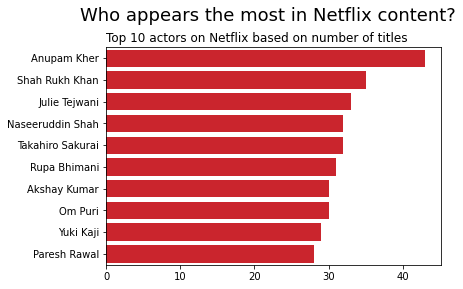

In [11]:
#Plotting most popular actors

plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black",
                    "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"})

sns.countplot(y = cast_data, order = cast_data.value_counts().index[:10], color = '#E50914')
plt.xlabel("")
plt.suptitle("Who appears the most in Netflix content?", fontsize = 18, va='top', y = 1.02)
plt.title("Top 10 actors on Netflix based on number of titles", loc = "left", y = 1)
plt.show()

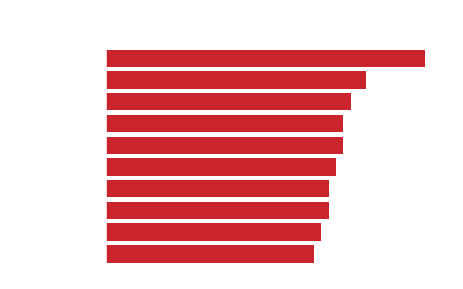

In [12]:
#Plotting most popular actors

plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white",
                    "ytick.color" : "white",
          "xtick.color" : "white",
          "axes.labelcolor" : "white",
          "axes.edgecolor" : "white"})

sns.countplot(y = cast_data, order = cast_data.value_counts().index[:10], color = '#E50914')
plt.xlabel("")
plt.suptitle("Who appears the most in Netflix content?", fontsize = 18, va='top', y = 1.02)
plt.title("Top 10 actors on Netflix based on number of titles", loc = "left", y = 1)
plt.show()

In [14]:
#Data Manipulation to plot most common directors

director_data = netflix[~(netflix.director.isna())]
director_data = director_data.set_index('title')
director_data = director_data.director.str.split(', ', expand=True).stack()
director_data = director_data.reset_index(level=1, drop=True)

director_data.head()

title
Dick Johnson Is Dead                Kirsten Johnson
Ganglands                           Julien Leclercq
Midnight Mass                         Mike Flanagan
My Little Pony: A New Generation      Robert Cullen
My Little Pony: A New Generation     José Luis Ucha
dtype: object

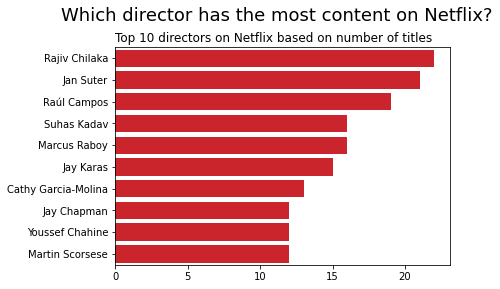

In [15]:
plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black",
                    "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"})

sns.countplot(y = director_data, order = director_data.value_counts().index[:10], color = '#E50914')
plt.xlabel("")
plt.suptitle("Which director has the most content on Netflix?", fontsize = 18, va='top', y = 1.02)
plt.title("Top 10 directors on Netflix based on number of titles", loc = "left", y = 1)
plt.show()

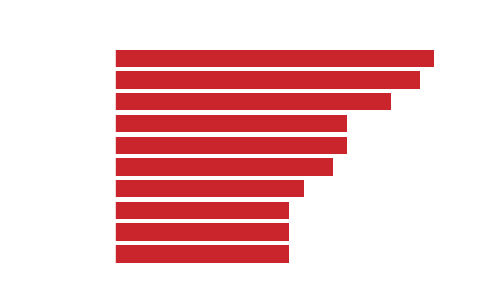

In [16]:
plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white",
                    "ytick.color" : "white",
          "xtick.color" : "white",
          "axes.labelcolor" : "white",
          "axes.edgecolor" : "white"})

sns.countplot(y = director_data, order = director_data.value_counts().index[:10], color = '#E50914')
plt.xlabel("")
plt.suptitle("Which director has the most content on Netflix?", fontsize = 18, va='top', y = 1.02)
plt.title("Top 10 directors on Netflix based on number of titles", loc = "left", y = 1)
plt.show()

In [17]:
#Proportion of ratings

ratings_netflix = netflix.rating.value_counts(normalize = True).reset_index()
ratings_netflix['rating'] = ratings_netflix['rating'] * 100
ratings_netflix = ratings_netflix[ratings_netflix.rating > 5]
ratings_netflix.columns = ['Rating', 'Proportion']

In [18]:
ratings_netflix.head()

,Rating,Proportion
0,TV-MA,36.430762
1,TV-14,24.537090
2,TV-PG,9.803476
3,R,9.076451
4,PG-13,5.566284


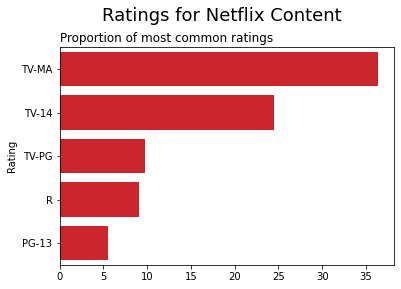

In [19]:
plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black",
                    "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"})


sns.barplot(y = ratings_netflix.Rating, x = ratings_netflix.Proportion, color = '#E50914')
plt.xlabel("")
plt.suptitle("Ratings for Netflix Content", fontsize = 18, va='top', y = 1.02)
plt.title("Proportion of most common ratings", loc = "left", y = 1)
plt.show()

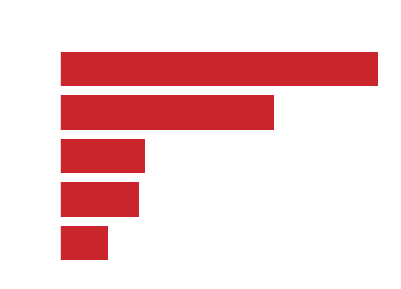

In [20]:
plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white",
                    "ytick.color" : "white",
          "xtick.color" : "white",
          "axes.labelcolor" : "white",
          "axes.edgecolor" : "white"})


sns.barplot(y = ratings_netflix.Rating, x = ratings_netflix.Proportion, color = '#E50914')
plt.xlabel("")
plt.suptitle("Ratings for Netflix Content", fontsize = 18, va='top', y = 1.02)
plt.title("Proportion of most common ratings", loc = "left", y = 1)
plt.show()

In [21]:
amazon = pd.read_csv('amazon_prime_titles.csv')
amazon.shape

(9668, 12)

In [22]:
ratings_amazon = amazon.rating.value_counts(normalize = True).reset_index()
ratings_amazon['rating'] = ratings_amazon['rating'] * 100
ratings_amazon = ratings_amazon[ratings_amazon.rating > 5]
ratings_amazon.columns = ['Rating', 'Proportion']

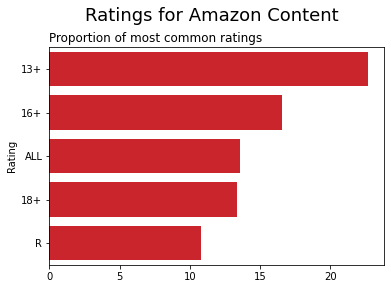

In [23]:
plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black",
                    "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"})



sns.barplot(y = ratings_amazon.Rating, x = ratings_amazon.Proportion, color = '#E50914')
plt.xlabel("")
plt.suptitle("Ratings for Amazon Content", fontsize = 18, va='top', y = 1.02)
plt.title("Proportion of most common ratings", loc = "left", y = 1)
plt.show()

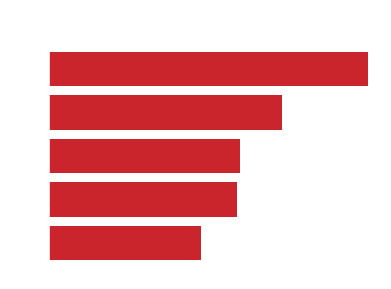

In [24]:
plt.rcParams.update({'text.color': "white",
                     'axes.labelcolor': "white",
                    "ytick.color" : "white",
          "xtick.color" : "white",
          "axes.labelcolor" : "white",
          "axes.edgecolor" : "white"})



sns.barplot(y = ratings_amazon.Rating, x = ratings_amazon.Proportion, color = '#E50914')
plt.xlabel("")
plt.suptitle("Ratings for Amazon Content", fontsize = 18, va='top', y = 1.02)
plt.title("Proportion of most common ratings", loc = "left", y = 1)
plt.show()

In [25]:
#Recommendation System

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
#https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [27]:
netflix_reco = netflix.copy()

In [28]:
#Removing stopwords (words that carry no significant meanings)
vectorizer = TfidfVectorizer(stop_words='english')

#Replacing NAs with null
netflix_reco['description'] = netflix_reco['description'].fillna('')

#Fitting and transforming the data to create matrix
vectorizer_matrix = vectorizer.fit_transform(netflix_reco['description'])

print(vectorizer_matrix.shape)

(8807, 18895)


In [29]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(vectorizer_matrix, vectorizer_matrix)

In [30]:
indices = pd.Series(netflix_reco.index, index=netflix_reco['title']).drop_duplicates()

In [32]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    #Pairwsie similarity of all movies with the considered movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Sorting all movies based on the similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    reco_scores = [i[1] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_reco['title'].iloc[movie_indices], reco_scores

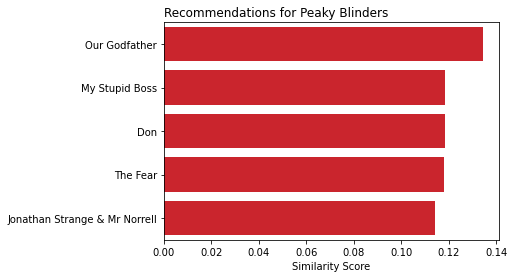

In [33]:
movies, scores = get_recommendations("Peaky Blinders")
recos = pd.DataFrame(list(movies), scores).reset_index()
recos.columns = ['Score', 'Title']


plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black",
                    "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"})
sns.barplot(x = recos.Score[0:5], y = recos.Title[0:5], color = '#E50914')
plt.xlabel("Similarity Score")
plt.ylabel("")
plt.title('Recommendations for Peaky Blinders', loc = "left", y = 1)
plt.show()

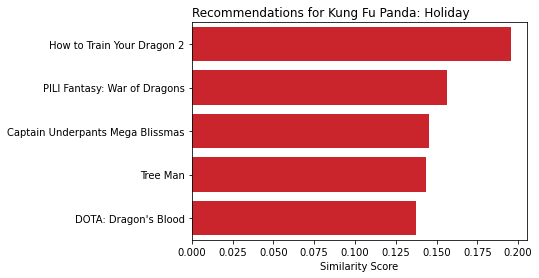

In [34]:
movies, scores = get_recommendations('Kung Fu Panda: Holiday')
recos = pd.DataFrame(list(movies), scores).reset_index()
recos.columns = ['Score', 'Title']


plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black",
                    "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black"})
sns.barplot(x = recos.Score[0:5], y = recos.Title[0:5], color = '#E50914')
plt.xlabel("Similarity Score")
plt.ylabel("")
plt.title('Recommendations for Kung Fu Panda: Holiday', loc = "left", y = 1)
plt.show()

In [37]:
pd.set_option('display.max_columns', 500)

In [22]:
netflix_rating = pd.read_csv('netflix_rating.csv')
netflix_rating.shape

(3026, 79)

In [23]:
netflix_rating.head()

,type,title,director,cast,country.x,date_added,release_year,rating,duration.x,listed_in,...,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,platform
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",...,52.0,8.3,42.0,3.8,20.0,7.3,259.0,5.8,105,netflix
1,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-Sep-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",...,224.0,5.5,96.0,5.5,23.0,5.6,383.0,6.3,1584,netflix
2,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,16-Sep-21,2001,R,122 min,"Dramas, Thrillers",...,15820.0,7.4,4431.0,7.4,744.0,7.8,67119.0,7.7,180795,netflix
3,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,14-Sep-21,2018,TV-MA,182 min,"Dramas, International Movies",...,10.0,8.7,3.0,3.8,12.0,6.3,23.0,4.6,55,netflix
4,Movie,Paradise Hills,Alice Waddington,"Emma Roberts, Danielle Macdonald, Awkwafina, E...","Spain, United States",9-Sep-21,2019,TV-MA,95 min,"Sci-Fi & Fantasy, Thrillers",...,895.0,5.5,190.0,5.0,130.0,5.5,1008.0,5.4,4141,netflix


In [24]:
netflix_rating.avg_vote.describe()

count    3026.000000
mean        5.904197
std         1.229663
min         1.500000
25%         5.200000
50%         6.000000
75%         6.800000
max         9.100000
Name: avg_vote, dtype: float64

(array([ 15.,  48., 105., 262., 376., 738., 788., 468., 197.,  29.]),
 array([1.5 , 2.26, 3.02, 3.78, 4.54, 5.3 , 6.06, 6.82, 7.58, 8.34, 9.1 ]),
 <BarContainer object of 10 artists>)

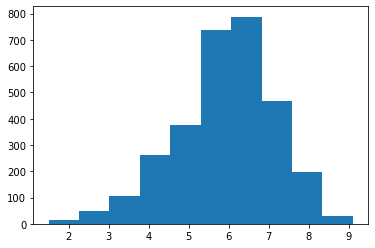

In [25]:
plt.hist(netflix_rating.avg_vote)

In [26]:
netflix_rating.head()

,type,title,director,cast,country.x,date_added,release_year,rating,duration.x,listed_in,...,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,platform
0,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",...,52.0,8.3,42.0,3.8,20.0,7.3,259.0,5.8,105,netflix
1,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-Sep-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",...,224.0,5.5,96.0,5.5,23.0,5.6,383.0,6.3,1584,netflix
2,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,16-Sep-21,2001,R,122 min,"Dramas, Thrillers",...,15820.0,7.4,4431.0,7.4,744.0,7.8,67119.0,7.7,180795,netflix
3,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,14-Sep-21,2018,TV-MA,182 min,"Dramas, International Movies",...,10.0,8.7,3.0,3.8,12.0,6.3,23.0,4.6,55,netflix
4,Movie,Paradise Hills,Alice Waddington,"Emma Roberts, Danielle Macdonald, Awkwafina, E...","Spain, United States",9-Sep-21,2019,TV-MA,95 min,"Sci-Fi & Fantasy, Thrillers",...,895.0,5.5,190.0,5.0,130.0,5.5,1008.0,5.4,4141,netflix


In [39]:
netflix_model = netflix_rating.copy()